In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize the model parameters
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            # Calculate the hyperplane equation
            linear_output = np.dot(X, self.weights) + self.bias

            # Apply the hinge loss and regularization
            loss = 1 - y * linear_output
            loss[loss < 0] = 0  # Max(0, 1 - y * linear_output)

            # Calculate gradients
            d_weights = -2 * self.lambda_param * np.dot(X.T, y * loss)
            d_bias = -2 * self.lambda_param * np.sum(y * loss)

            # Update parameters
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


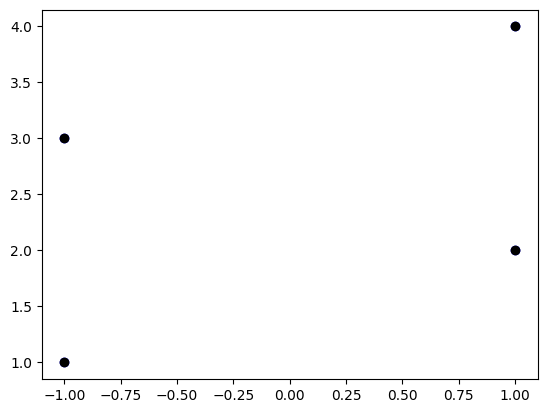

In [16]:
# Example data
X = np.array([[2, 2], [4, 4], [1, 3], [3, 1]], dtype=float)
y = np.array([1, 1, -1, -1])

# Instantiate the SVM model
svm = SVM()

plt.scatter(y,X[:,0],color ='b')
plt.scatter(y,X[:,1], color = 'k')

In [5]:
svm.fit(X, y)


In [6]:
new_samples = np.array([[1, 1], [5, 5]])

predictions = svm.predict(new_samples)
print(predictions)


[-1.  1.]
